In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path = "your training dataset"
main_df = pd.read_csv(file_path)

file_path = "yout test dataset"
text_df = pd.read_csv(file_path)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [5]:
df = main_df.copy()
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
new_columns = [f'col{i}' for i in range(10)]

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    label_value = row['label']
    
    # Create new columns and set values based on the label
    new_values = [1 if i == label_value else 0 for i in range(10)]
    
    # Assign the new values to the corresponding columns
    df.loc[index, new_columns] = new_values


# Print the updated DataFrame
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  col0  col1  col2  col3  col4  col5  col6  col7  col8  col9  
0       0  ...   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0  ...   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0  ...   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
4       0  ...   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 795 columns]


In [ ]:
Y = df[["col0", "col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9"]]
X = df.drop(['label', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9'], axis=1)
for i in range(0, 784, 4):  # Assuming you have 784 pixels (28x28 image)
    col1 = f'pixel{i}'
    col2 = f'pixel{i+1}'
    col3 = f'pixel{i+2}'
    col4 = f'pixel{i+3}'
    new_col = f'combined_{i // 4}'  # Create a new column with a new name

    # Use bitwise OR to combine four pixels and set the result to one if any pixel is one
    X[new_col] = X[col1] | X[col2] | X[col3] | X[col4]

    # Drop the original columns if you don't need them anymore
    X = X.drop(columns=[col1, col2, col3, col4])
print(X.head())


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)
print(X_train.shape)

(29399, 196)


In [24]:

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[196]),
    layers.Dense(196, activation='relu'),
    layers.Dense(78, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10),
])

In [25]:
# compile the model
custom_optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=custom_optimizer,
    loss='mean_squared_error'
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=16,
    epochs=15,
    verbose=1,
)

Epoch 1/15
1838/1838 [==============================] - 8s 4ms/step - loss: 0.0391 - val_loss: 0.3515
Epoch 2/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0149 - val_loss: 0.1534
Epoch 3/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0118 - val_loss: 0.1298
Epoch 4/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0103 - val_loss: 0.3981
Epoch 5/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0093 - val_loss: 0.2985
Epoch 6/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0084 - val_loss: 0.0499
Epoch 7/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0078 - val_loss: 1.1947
Epoch 8/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0075 - val_loss: 0.0557
Epoch 9/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.0072 - val_loss: 0.0367
Epoch 10/15
1838/1838 [==============================] - 7s 4ms/step - loss: 0.006

Minimum Validation Loss: 0.0156


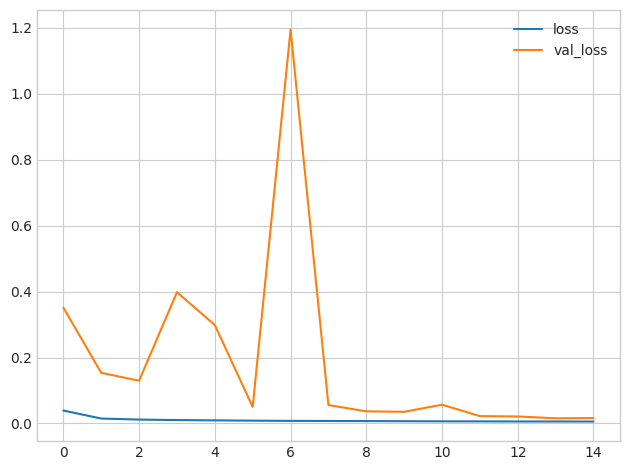

In [26]:
# print the graph
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [ ]:
for i in range(0, 784, 4):  # Assuming you have 784 pixels (28x28 image)
    col1 = f'pixel{i}'
    col2 = f'pixel{i+1}'
    col3 = f'pixel{i+2}'
    col4 = f'pixel{i+3}'
    new_col = f'combined_{i // 4}'  # Create a new column with a new name

    # Use bitwise OR to combine four pixels and set the result to one if any pixel is one
    text_df[new_col] = text_df[col1] | text_df[col2] | text_df[col3] | text_df[col4]

    # Drop the original columns if you don't need them anymore
    text_df = text_df.drop(columns=[col1, col2, col3, col4])


In [27]:
y_pred = model.predict(text_df)
print(y_pred[1])
max_index = np.argmax(y_pred[2])
print("Index of the maximum value:", max_index)

875/875 [==============================] - 1s 1ms/step
[ 0.9609629  -0.0025059  -0.01722272  0.01069466 -0.00630534  0.00895476
  0.00658948  0.03390718  0.01028711 -0.00521242]
Index of the maximum value: 9


In [28]:
# write the output to csv file
import csv
num_predictions = len(y_pred)
image_ids = np.arange(1, num_predictions + 1)

# Writing to CSV file
csv_file_path = 'file_name.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['ImageId', 'Label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write data
    for image_id, predicted_scores in zip(image_ids, y_pred):
        predicted_digit = np.argmax(predicted_scores)
        writer.writerow({'ImageId': image_id, 'Label': predicted_digit})

print(f"Output written to {csv_file_path}")

Output written to output_predictions25.csv
